# Is *Star Wars: The Empire Strikes Back* the best Star Wars Movie among Star Wars Fans?

In this notebook, I will be analyzing the survey responses from Starwars fans about their opinions on *The Empire Strikes Back*. The data is available [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

## 1. Reading Data & Initial Exploration

In [2]:
for col in star_wars.columns:
    print(col)
    print("\n")

RespondentID


Have you seen any of the 6 films in the Star Wars franchise?


Do you consider yourself to be a fan of the Star Wars film franchise?


Which of the following Star Wars films have you seen? Please select all that apply.


Unnamed: 4


Unnamed: 5


Unnamed: 6


Unnamed: 7


Unnamed: 8


Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.


Unnamed: 10


Unnamed: 11


Unnamed: 12


Unnamed: 13


Unnamed: 14


Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.


Unnamed: 16


Unnamed: 17


Unnamed: 18


Unnamed: 19


Unnamed: 20


Unnamed: 21


Unnamed: 22


Unnamed: 23


Unnamed: 24


Unnamed: 25


Unnamed: 26


Unnamed: 27


Unnamed: 28


Which character shot first?


Are you familiar with the Expanded Universe?


Do you consider yourself to be a fan of the Expanded Universe?


Do you consider yourself to be a fan of the Star

In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

## 2. Data Transformation

### 2.1. Convert the fields with "Yes", "No" values to booleans

In [4]:
yes_no = {"Yes": True, "No": False}
cols = ["Have you seen any of the 6 films in the Star Wars franchise?",
        "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)
    
star_wars[cols].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,True,True
1,False,NaN
2,True,False
3,True,True
4,True,True


### 2.2. Clean Checkbox Columns

There are several columns whose name is "Unnamed". From "Unnamed4" to "Unnamed8", these are the answers to the question; *Which of the following Star Wars films hav eyou seen? Please select all that apply.* For **Unnamed: 4**, for instance, the movie in question was *Star Wars: Episode II Attack of the Clones*. See the table below for more info

Here are the transformation I will be doing;

| Column Name | Corresponding Movie |
|:------------|:---------------:|
|Unnamed: 4 |Star Wars: Episode II Attack of the Clones |
|Unnamed: 5 |Star Wars: Episode III Revenge of the Sith.|
|Unnamed: 6 |Star Wars: Episode IV A New Hope|
|Unnamed: 7 |Star Wars: Episode V The Empire Strikes Back|
|Unnamed: 8 |Star Wars: Episode VI Return of the Jedi|

I will be replacing the column names with movie names to show whether a person has watched that movie. Also, since the responses are in the form; [<movie name>, nan], I will relacing the <movie name> with True, and nan with False. I am assuing that if the person did not mark the checkbox asking them whether they have watched that movie, they haven't watched it.


In [5]:
# First, update the column names

import numpy as np
def get_new_column(column):
    return 'Seen "' + list(column[column.notnull()])[0] + '"'
    
for column in star_wars.columns[3:9]:
    new_column =  get_new_column(star_wars[column])
    star_wars = star_wars.rename({column: new_column}, axis=1)

star_wars.iloc[:, 3:9].columns

Index(['Seen "Star Wars: Episode I  The Phantom Menace"',
       'Seen "Star Wars: Episode II  Attack of the Clones"',
       'Seen "Star Wars: Episode III  Revenge of the Sith"',
       'Seen "Star Wars: Episode IV  A New Hope"',
       'Seen "Star Wars: Episode V The Empire Strikes Back"',
       'Seen "Star Wars: Episode VI Return of the Jedi"'],
      dtype='object')

In [6]:
# Second, we update the values

def watched_this_movie(movie):
    if(type(movie) == str):
        return True
    else:
        return False

for movie in star_wars.columns[3:9]:
    star_wars[movie] = star_wars[movie].apply(watched_this_movie)
    
star_wars[3:9]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,"Seen ""Star Wars: Episode I The Phantom Menace""","Seen ""Star Wars: Episode II Attack of the Clones""","Seen ""Star Wars: Episode III Revenge of the Sith""","Seen ""Star Wars: Episode IV A New Hope""","Seen ""Star Wars: Episode V The Empire Strikes Back""","Seen ""Star Wars: Episode VI Return of the Jedi""",Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic


### 2.3 Clean the Ranking Columns

I am going to clean the columns below

In [7]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

All the columns above concern to ranking varous star wars movies. For the column **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.**, users were asked to rank *Star Wars: Episode I The Phantom Menace*. A value of 1 shows the user found it as favorite while if they gave it a value of 6, they liked it the least. The table below shows corresponding movie for each of the column names


| Column Name | Corresponding Movie  |
|:----------:|:------------------------------------------:|
|Unnamed: 10 |Star Wars: Episode II Attack of the Clones |
|Unnamed: 11 |Star Wars: Episode III Revenge of the Sith |
|Unnamed: 12 |Star Wars: Episode IV A New Hope|
|Unnamed: 13 |Star Wars: Episode V The Empire Strikes Back |
|Unnamed: 14 |Star Wars: Episode VI Return of the Jedi |

In [8]:
# First I convert the values to numeric type

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
# Second, I Rename the columns to appropriate values

new_colnames = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Star Wars: Episode I The Phantom Menace",
    "Unnamed: 10": "Star Wars: Episode II Attack of the Clones",
    "Unnamed: 11": "Star Wars: Episode III Revenge of the Sith",
    "Unnamed: 12": "Star Wars: Episode IV A New Hope",
    "Unnamed: 13": "Star Wars: Episode V The Empire Strikes Back",
    "Unnamed: 14": "Star Wars: Episode VI Return of the Jedi"
}

star_wars = star_wars.rename(new_colnames, axis=1)
star_wars.columns[9:15]

Index(['Star Wars: Episode I The Phantom Menace',
       'Star Wars: Episode II Attack of the Clones',
       'Star Wars: Episode III Revenge of the Sith',
       'Star Wars: Episode IV A New Hope',
       'Star Wars: Episode V The Empire Strikes Back',
       'Star Wars: Episode VI Return of the Jedi'],
      dtype='object')

## 3. Analyses

### 3.1. Finding the Highest Ranked Movie

The figure below shows the highest ranked movies. Recall that 1 represents the most favorite, while 6 corresponds to the least favorite

In the figure, we see that *Star Wars: Episode V the Empire Strikes Back* is the most favorite in the franchise while *Star Wars: Episode III Revenge of the Sith* is the least favorite

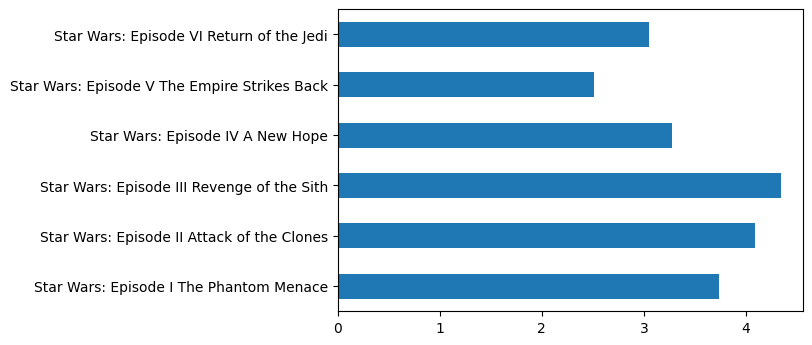

In [10]:
%matplotlib inline

star_wars.iloc[:, 9:15].mean().plot.barh()

### 3.2. Finding the Most Viewed Movie

The following columns show user inputs on whether or not they had watched the movie

In [11]:
star_wars.iloc[:, 3:9].head()

,"Seen ""Star Wars: Episode I The Phantom Menace""","Seen ""Star Wars: Episode II Attack of the Clones""","Seen ""Star Wars: Episode III Revenge of the Sith""","Seen ""Star Wars: Episode IV A New Hope""","Seen ""Star Wars: Episode V The Empire Strikes Back""","Seen ""Star Wars: Episode VI Return of the Jedi"""
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


Here is how many of the 816 respondents had watch each of the movies

In [12]:
star_wars.iloc[:, 3:9].sum()

Seen "Star Wars: Episode I  The Phantom Menace"        673
Seen "Star Wars: Episode II  Attack of the Clones"     571
Seen "Star Wars: Episode III  Revenge of the Sith"     550
Seen "Star Wars: Episode IV  A New Hope"               607
Seen "Star Wars: Episode V The Empire Strikes Back"    758
Seen "Star Wars: Episode VI Return of the Jedi"        738
dtype: int64

We can create a bar plot too

Besides being the favorite of the bunch, *Star Wars: Episode 5 The Empire Strikes Back* Was also the most watched as is evident in the figure below

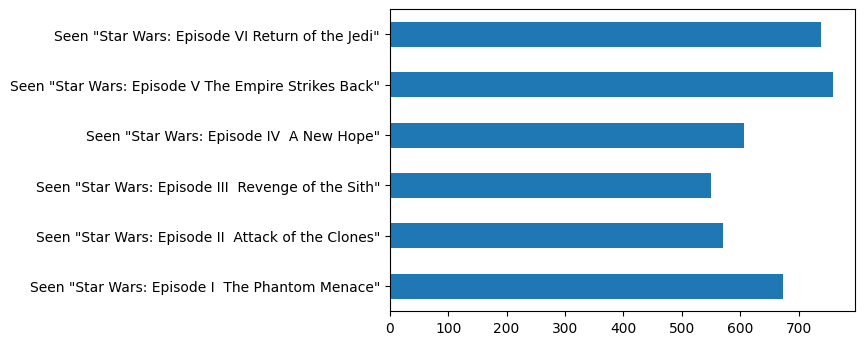

In [13]:
star_wars.iloc[:, 3:9].sum().plot.barh()

### 3.3 Explore the Data by Binary Segments

There are segments in the data that I would like to explore specifically. For instance, the respondents were asked questions regarding their gender, whether or not they are star wars fans, whether or not they are star trek fans, etc. I would like to know how these factors relate to the rest of their responses.

Here are the columns I am talking about

In [14]:
star_wars[[
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Do you consider yourself to be a fan of the Star Trek franchise?",
    "Gender"
]].head()

,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender
0,True,No,Male
1,NaN,Yes,Male
2,False,No,Male
3,True,Yes,Male
4,True,No,Male


#### 3.1.1 Examine Ratings and Viewership by Gender

In [15]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

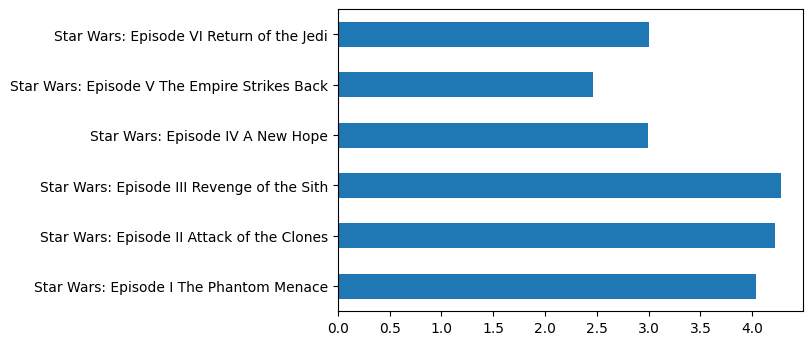

In [16]:
# Male Ratings

males.iloc[:, 9:15].mean().plot.barh()

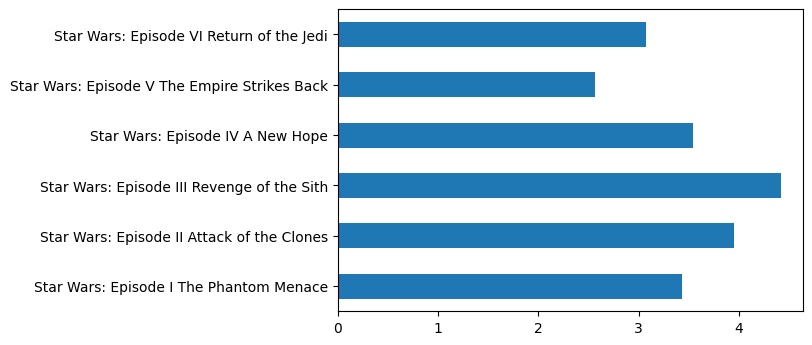

In [17]:
# Females Rating

females.iloc[:, 9:15].mean().plot.barh()

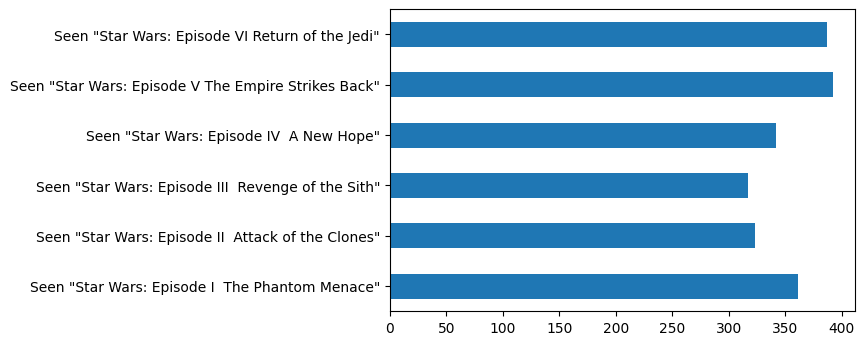

In [18]:
# Males Most Watched

males.iloc[:, 3:9].sum().plot.barh()

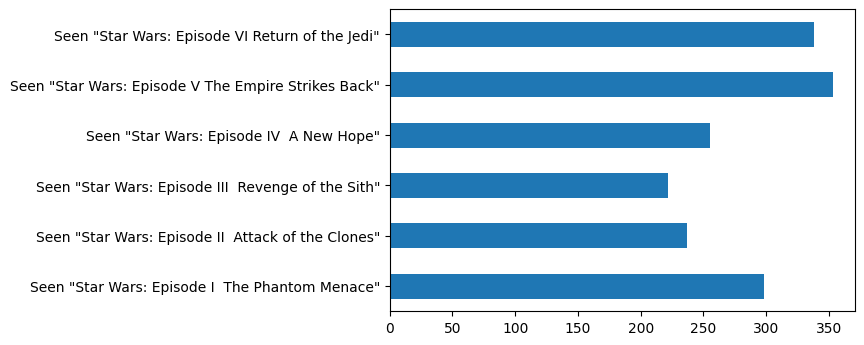

In [19]:
# Females Most Watched

females.iloc[:, 3:9].sum().plot.barh()

#### 3.1.1 Examine Ratings and Viewership by "Star Wars Fanship"

In [20]:
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

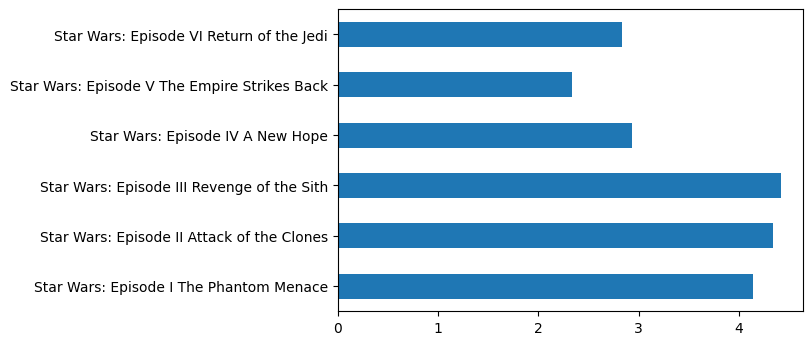

In [21]:
# Star Wars Fan Ratings

fan.iloc[:, 9:15].mean().plot.barh()

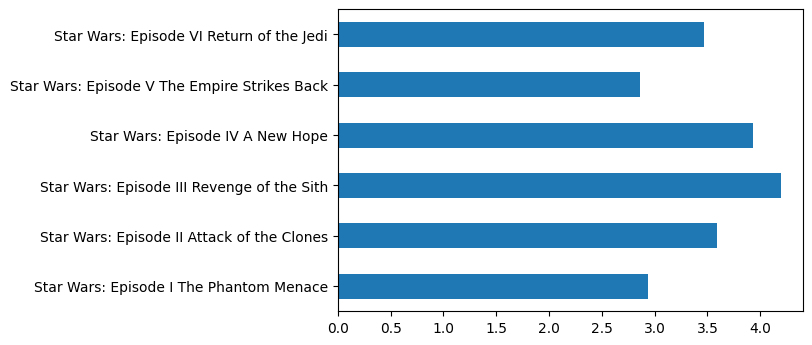

In [22]:
# Star Wars Non-Fan Ratings

non_fan.iloc[:, 9:15].mean().plot.barh()

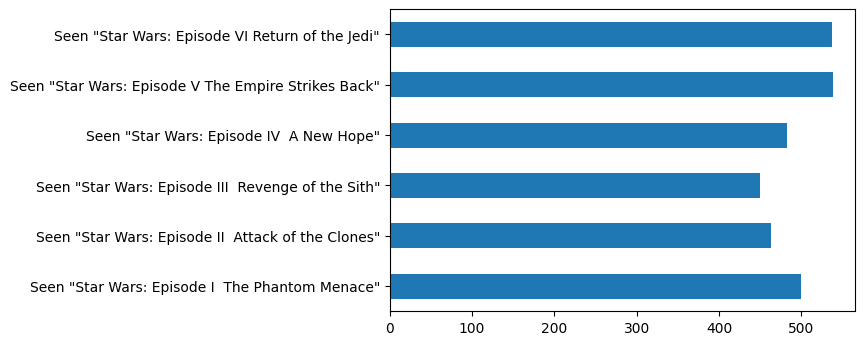

In [23]:
# Star Wars Fans Most Watched

fan.iloc[:, 3:9].sum().plot.barh()

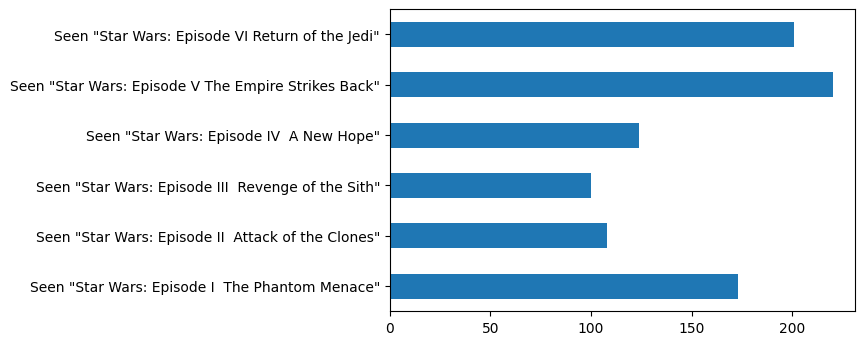

In [24]:
# Star Wars Non-Fans Most Watched

non_fan.iloc[:, 3:9].sum().plot.barh()

#### 3.1.1 Examine Ratings and Viewership by "Star Trek Fanship"

In [25]:
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
non_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

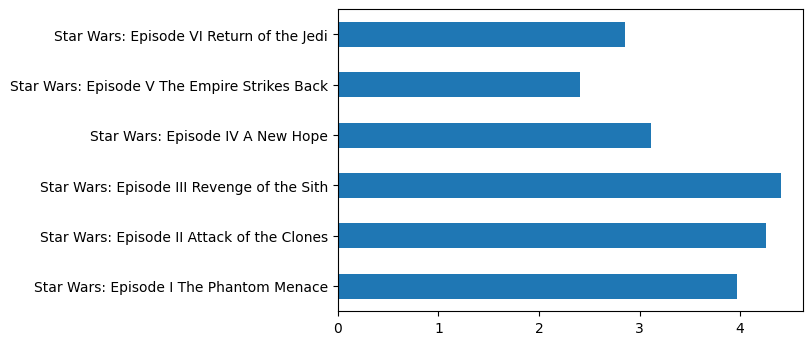

In [26]:
# Star Trek Fan Ratings

fan.iloc[:, 9:15].mean().plot.barh()

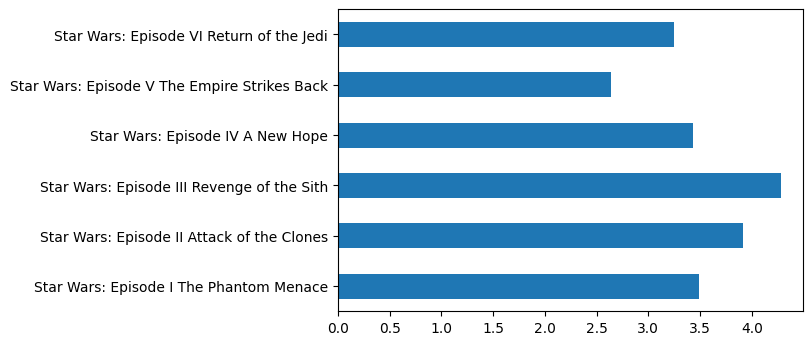

In [27]:
# Star Trek Non-Fan Ratings

non_fan.iloc[:, 9:15].mean().plot.barh()

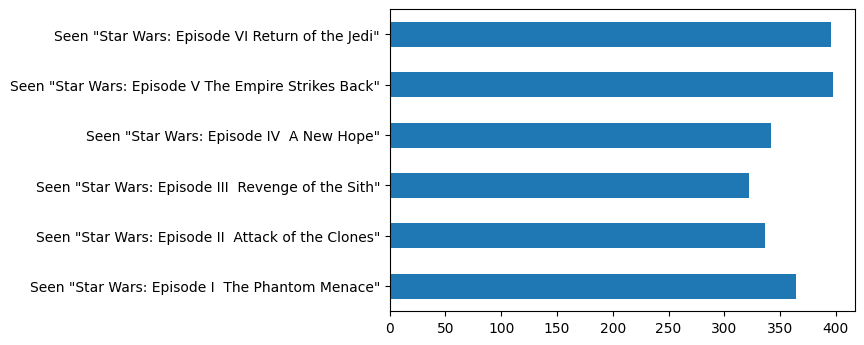

In [28]:
# Star Trek Fans Most Watched

fan.iloc[:, 3:9].sum().plot.barh()

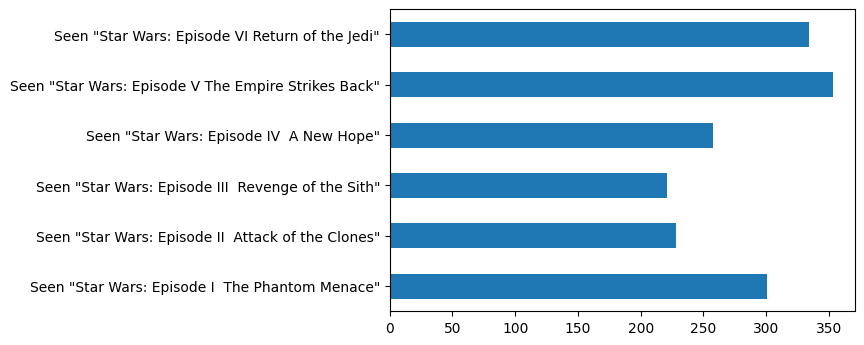

In [30]:
# Star Trek Non-Fans Most Watched

non_fan.iloc[:, 3:9].sum().plot.barh()

From the figures above, it is evident that ratings and viewership differed considerably depending on whether the user was male, female, a fan of star wars, or star trek, or not a fan at all. See a summary of all these in the table below

In [60]:
gender_watch = star_wars.groupby("Gender")[
    [
        'Seen "Star Wars: Episode I  The Phantom Menace"',
        'Seen "Star Wars: Episode II  Attack of the Clones"',
        'Seen "Star Wars: Episode III  Revenge of the Sith"',
        'Seen "Star Wars: Episode IV  A New Hope"',
        'Seen "Star Wars: Episode V The Empire Strikes Back"',
        'Seen "Star Wars: Episode VI Return of the Jedi"'
    ]
].sum().transpose()

gender_watch['Gender Difference'] = gender_watch['Male'] - gender_watch['Female']
gender_watch['Gender Pct Difference'] = gender_watch['Gender Difference'] / gender_watch['Female'] * 100


star_wars_fan_watch = star_wars.groupby("Do you consider yourself to be a fan of the Star Wars film franchise?")[
    [
        'Seen "Star Wars: Episode I  The Phantom Menace"',
        'Seen "Star Wars: Episode II  Attack of the Clones"',
        'Seen "Star Wars: Episode III  Revenge of the Sith"',
        'Seen "Star Wars: Episode IV  A New Hope"',
        'Seen "Star Wars: Episode V The Empire Strikes Back"',
        'Seen "Star Wars: Episode VI Return of the Jedi"'
    ]
].sum().transpose()

star_wars_fan_watch['Star Wars Difference'] = star_wars_fan_watch[True] - star_wars_fan_watch[False]
star_wars_fan_watch['Star Wars Pct Difference'] = star_wars_fan_watch['Star Wars Difference'] / star_wars_fan_watch[False] * 100


star_trek_fan_watch = star_wars.groupby("Do you consider yourself to be a fan of the Star Trek franchise?")[
    [
        'Seen "Star Wars: Episode I  The Phantom Menace"',
        'Seen "Star Wars: Episode II  Attack of the Clones"',
        'Seen "Star Wars: Episode III  Revenge of the Sith"',
        'Seen "Star Wars: Episode IV  A New Hope"',
        'Seen "Star Wars: Episode V The Empire Strikes Back"',
        'Seen "Star Wars: Episode VI Return of the Jedi"'
    ]
].sum().transpose()

star_trek_fan_watch['Star Trek Difference'] = star_trek_fan_watch['Yes'] - star_trek_fan_watch['No']
star_trek_fan_watch['Star Trek Pct Difference'] = star_trek_fan_watch['Star Trek Difference'] / star_trek_fan_watch['No'] * 100

In [61]:
combined = pd.concat([gender_watch,
           star_wars_fan_watch,
           star_trek_fan_watch], axis=1)

difference = combined[[
    "Gender Difference",
    "Gender Pct Difference",
    "Star Wars Difference",
    "Star Wars Pct Difference",
    "Star Trek Difference",
    "Star Trek Pct Difference"
]]

difference

,Gender Difference,Gender Pct Difference,Star Wars Difference,Star Wars Pct Difference,Star Trek Difference,Star Trek Pct Difference
"Seen ""Star Wars: Episode I The Phantom Menace""",63.0,21.140940,327.0,189.017341,63.0,20.930233
"Seen ""Star Wars: Episode II Attack of the Clones""",86.0,36.286920,355.0,328.703704,108.0,47.368421
"Seen ""Star Wars: Episode III Revenge of the Sith""",95.0,42.792793,350.0,350.000000,101.0,45.701357
"Seen ""Star Wars: Episode IV A New Hope""",87.0,34.117647,359.0,289.516129,84.0,32.558140
"Seen ""Star Wars: Episode V The Empire Strikes Back""",39.0,11.048159,318.0,144.545455,44.0,12.464589
"Seen ""Star Wars: Episode VI Return of the Jedi""",49.0,14.497041,336.0,167.164179,62.0,18.562874


In [59]:
difference.mean()

Gender Difference            69.833333
Gender Pct Difference         0.266472
Star Wars Difference        340.833333
Star Wars Pct Difference      2.448245
Star Trek Difference         77.000000
Star Trek Pct Difference      0.295976
dtype: float64

We see from the table above that for the average number of males who watched any of the 6 episodes of starwars was roughly 69 people more than their female counterparts. This is a relatively huge difference as the number of males watching the episodes wash, on average, 26% more than females. This difference is somewhat similar in terms of Star Trek fans. That is, the effect of being a Star Trek fan was somewhat similar to gender as there were roughly 29% more Star Trek fans who watched Star Wars movie compared to Non Star Trek Fans. The difference was also relatively small among Star Trek and non Star Trek fans. The biggest difference was among Star Wars and non-Star Wars fans. The number of fans who watched the episodes was 77% more than those who weren't fans